<a href="https://colab.research.google.com/github/nwudochika/nwudo-cj/blob/main/practical_machine_learning_Course_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning Project

In [ ]:
import numpy as np   
import pandas as pd  
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns


from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint
import statsmodels.stats.api as sms
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay,mean_squared_error
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
data = pd.read_csv("WineQT.csv")

In [ ]:
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

In [ ]:
# Code to display the number of rows and columns
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 1143 rows and 13 columns.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


Observations:
- There are 13 numeric variables. No categorical variable.
- The variable "quality" has been identified as the target variable.

In [ ]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [ ]:
data.isna().sum() 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

There is no missing data in the data.

In [ ]:
data.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [ ]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality           Id  
count  1143.000000  1143.000000  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442111     5.657043   804.969379  
std       0.156664     0.170399     1.082196     0.805824   463.997116  
min       2.740000     0.330000     8.400000     3.000000     0.000000  
25%       3.205000     0.550000     9.500000     5.000000   411.000000  
50%       3.310000     0.620000    10.200000     6.000000   794.000000  
75%       3.400000     0.730000    11.100000     6.000000  1209.500000  
max       4.010000     2.000000    14.900000     8.000000  1597.000000

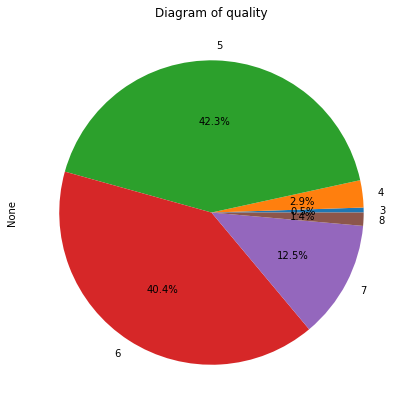

In [ ]:
# Pie chart to represent target data
data.groupby('quality').size().plot(kind='pie', autopct='%1.1f%%')
plt.title('Diagram of quality')
fig = plt.gcf()
fig.set_size_inches(7,7)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

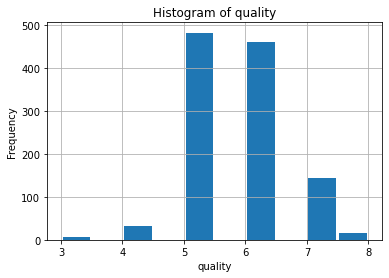

In [ ]:
# Plot a histogram of the target column to visualize the occurrences in each of the quality type.
data.hist('quality',bins= 10, rwidth=0.9)
plt.title('Histogram of quality')
plt.xlabel('quality')
plt.ylabel('Frequency')
plt.show

The target variable has 6 responses (3, 4, 5, 6, 7 and 8). Response 5 and 6 has about 83% of the responses of the data.

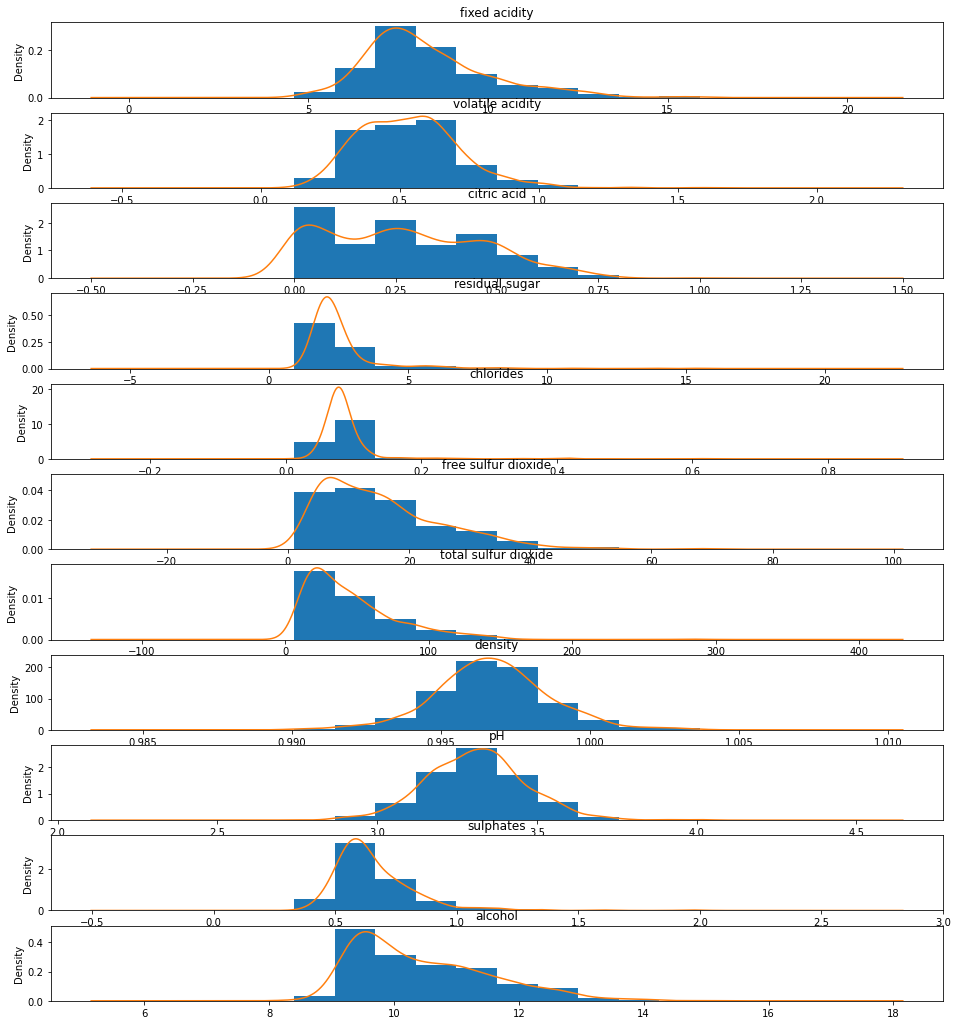

In [ ]:
#histogram the 11 columns that we could have outlier(for the rest since they are encoding and labeled columns they shouldnt have outlier)
to_be_plotted =['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'] 
def plothist (df1, features):
    fig, axs = plt.subplots(len(features),1,figsize=(16,18))
    j = 0 
    for item in features :
        df1[item].hist(ax=axs[j], density=True);
        df1[item].plot.density(ax=axs[j], title=item)
        j=j+1
   
plothist(data,to_be_plotted)

C:\Users\HP PAVILION\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP PAVILION\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP PAVILION\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP P

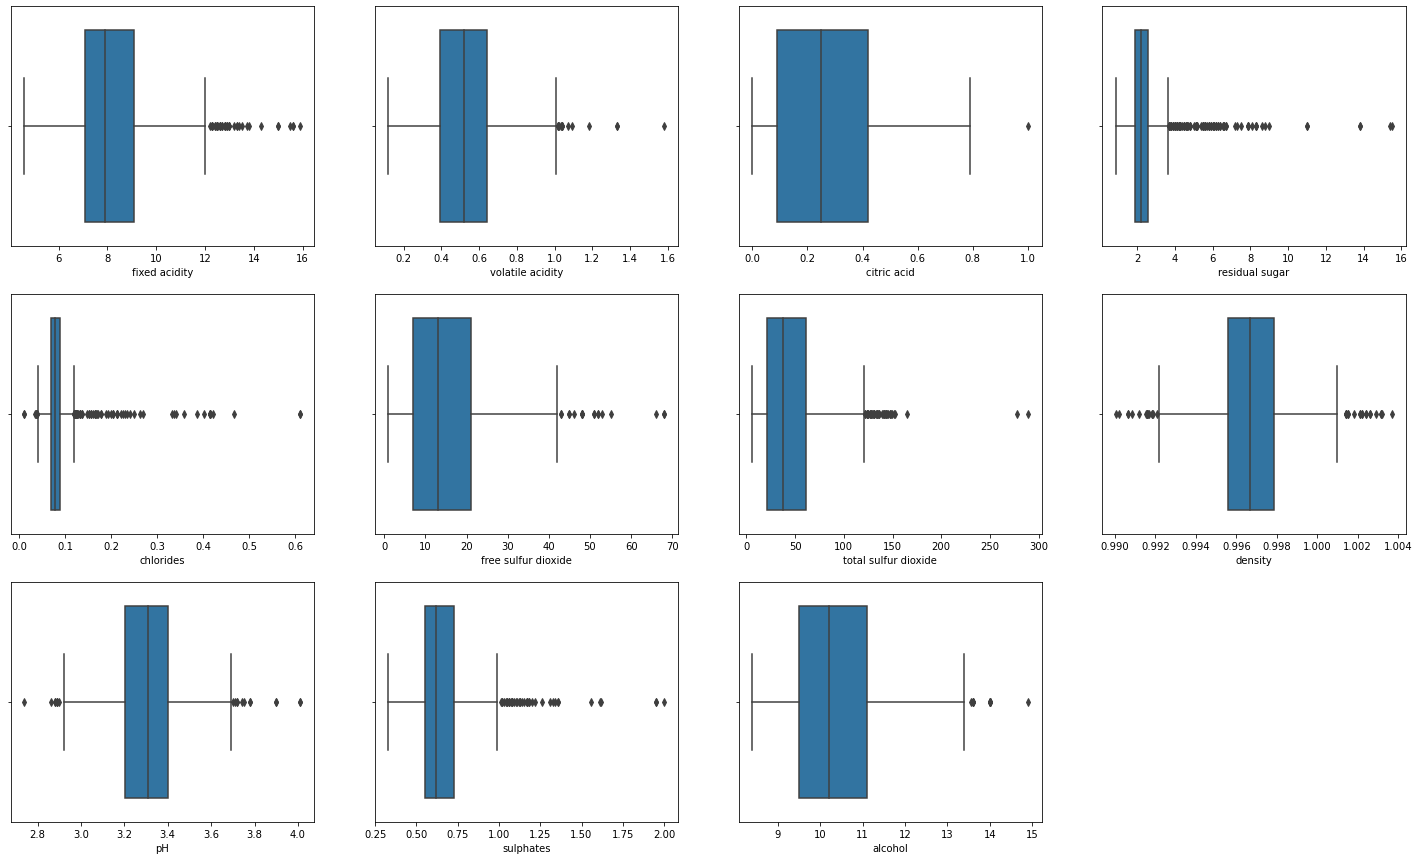

In [ ]:
j=1 
fig = plt.figure(figsize = (25,15))
for i in ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']:
    plt.subplot(3,4,j)
    sns.boxplot(data[i])
    j=j+1

In [ ]:
def plot (param1, param2, param3, param4,param5,param6,param7,param8,param9,param10,param11,str1,str2,str3,
          str4,str5,str6,str7,str8,str9,str10,str11): #getting colums name and Boxplot Title 
    fig, axs = plt.subplots(3,5,figsize=(15,6))
    axs = axs.flatten()
    axs[0].boxplot(param1)
    axs[0].set_title(str1)
    axs[1].boxplot(param2)
    axs[1].set_title(str2)
    axs[2].boxplot(param3)
    axs[2].set_title(str3)
    axs[3].boxplot(param4)
    axs[3].set_title(str4)
    axs[4].boxplot(param5)
    axs[4].set_title(str5)
    axs[5].boxplot(param6)
    axs[5].set_title(str6)
    axs[6].boxplot(param7)
    axs[6].set_title(str7)
    axs[7].boxplot(param8)
    axs[7].set_title(str8)
    axs[8].boxplot(param9)
    axs[8].set_title(str9)
    axs[9].boxplot(param10)
    axs[9].set_title(str10)
    axs[10].boxplot(param11)
    axs[10].set_title(str11)
                     
      
    plt.show()
    
# Defining a function for IQR outlier method 

def replace_outliers_IQR(column):
    q1=column.quantile(0.25)
    q3=column.quantile(0.75)
    iqr = q3-q1
    low_lim = q1 - 1.5*iqr
    high_lim = q3 + 1.5*iqr
    column = np.where(column >= high_lim, high_lim, np.where(column <= low_lim, low_lim, column))
    return column

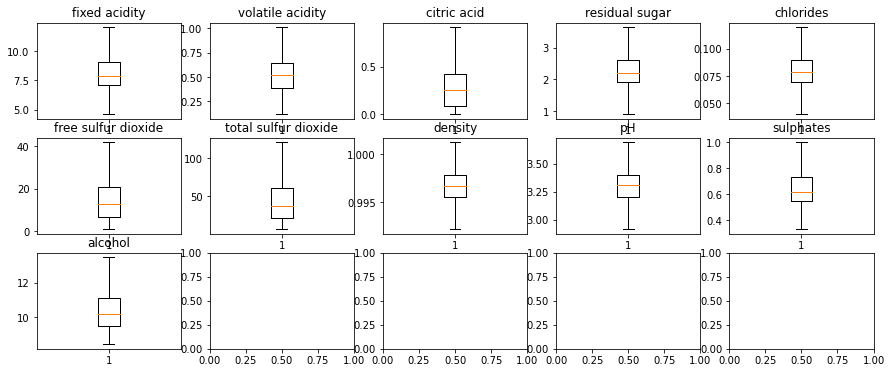

In [ ]:
# Here we replaced Outlier with Low and High lim which define in above method  
data['fixed acidity'] = replace_outliers_IQR(data['fixed acidity'])
data['volatile acidity'] = replace_outliers_IQR(data['volatile acidity'])
data['citric acid'] = replace_outliers_IQR(data['citric acid'])
data['residual sugar'] = replace_outliers_IQR(data['residual sugar'])
data['chlorides'] = replace_outliers_IQR(data['chlorides'])
data['free sulfur dioxide'] = replace_outliers_IQR(data['free sulfur dioxide'])
data['total sulfur dioxide'] = replace_outliers_IQR(data['total sulfur dioxide'])
data['density'] = replace_outliers_IQR(data['density'])
data['pH'] = replace_outliers_IQR(data['pH'])
data['sulphates'] = replace_outliers_IQR(data['sulphates'])
data['alcohol'] = replace_outliers_IQR(data['alcohol'])

plot(data['fixed acidity'],data['volatile acidity'],data['citric acid'],data['residual sugar'],data['chlorides'],
     data['free sulfur dioxide'],
     data['total sulfur dioxide'],data['density'],data['pH'],data['sulphates'], data['alcohol'],'fixed acidity', 
     'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol')



In [ ]:
data.describe().T

count        mean         std       min        25%  \
fixed acidity         1143.0    8.269991    1.630215  4.600000    7.10000   
volatile acidity      1143.0    0.529884    0.174273  0.120000    0.39250   
citric acid           1143.0    0.268290    0.196425  0.000000    0.09000   
residual sugar        1143.0    2.323141    0.609600  0.900000    1.90000   
chlorides             1143.0    0.080926    0.017753  0.040000    0.07000   
free sulfur dioxide   1143.0   15.463255    9.725860  1.000000    7.00000   
total sulfur dioxide  1143.0   45.127297   29.974752  6.000000   21.00000   
density               1143.0    0.996725    0.001843  0.992157    0.99557   
pH                    1143.0    3.310105    0.151786  2.912500    3.20500   
sulphates             1143.0    0.648994    0.136473  0.330000    0.55000   
alcohol               1143.0   10.437854    1.068643  8.400000    9.50000   
quality               1143.0    5.657043    0.805824  3.000000    5.00000   
Id                    1143.0  804.969379  463.997116  0.000000  411.00000   

                            50%          75%          max  
fixed acidity           7.90000     9.100000    12.100000  
volatile acidity        0.52000     0.640000     1.011250  
citric acid             0.25000     0.420000     0.915000  
residual sugar          2.20000     2.600000     3.650000  
chlorides               0.07900     0.090000     0.120000  
free sulfur dioxide    13.00000    21.000000    42.000000  
total sulfur dioxide   37.00000    61.000000   121.000000  
density                 0.99668     0.997845     1.001257  
pH                      3.31000     3.400000     3.692500  
sulphates               0.62000     0.730000     1.000000  
alcohol                10.20000    11.100000    13.500000  
quality                 6.00000     6.000000     8.000000  
Id                    794.00000  1209.500000  1597.000000

## Feature Engineering

In [ ]:
# The target variable was updated after the change 3-6 not good wine, 6-8 good wine
data["quality"] = 1 * (data["quality"] >= 6)
qualityEqualsOne = data['quality'] == 1
qualityEqualsZero = data['quality'] == 0

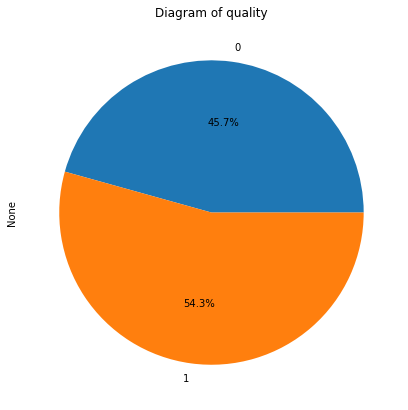

In [ ]:
# 2nd Pie chart to represent target data after transforming data
data.groupby('quality').size().plot(kind='pie', autopct='%1.1f%%')
plt.title('Diagram of quality')
fig = plt.gcf()
fig.set_size_inches(7,7)
plt.show()

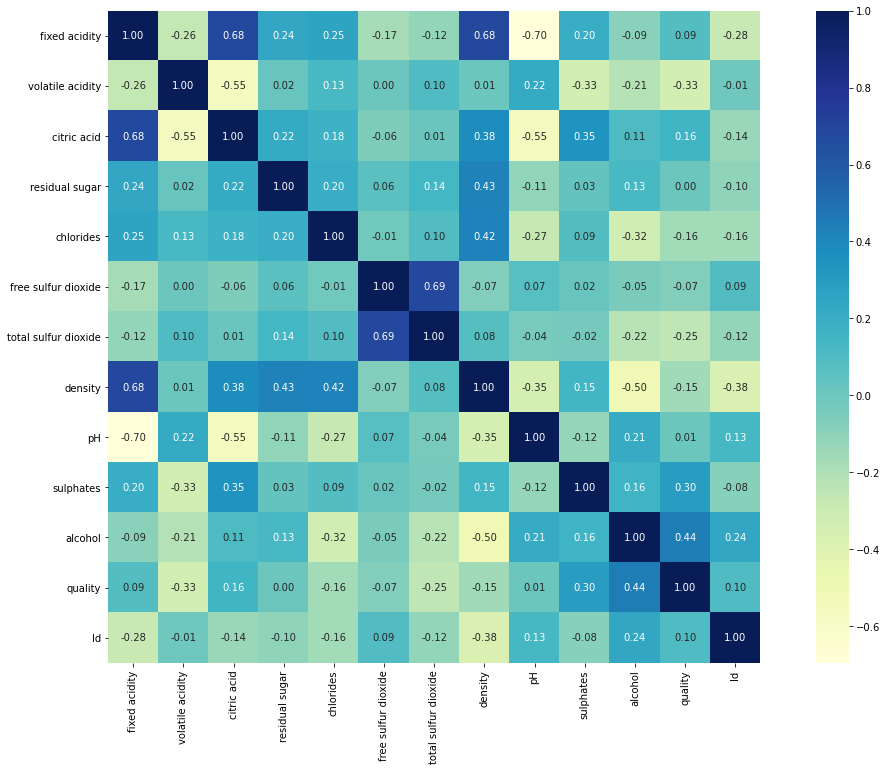

In [ ]:
#Let's Look at correlation values
corr=data.corr()
fig,ax=plt.subplots(figsize=(20,12))
ax=sns.heatmap(corr,annot=True,square=True,fmt=".2f",cmap="YlGnBu")
plt.show()

Observation:
- The variable citric acid and fixed acidity are have some correlation between them. This will need to be checked further.
- The correlations between the remaining variables are very small.

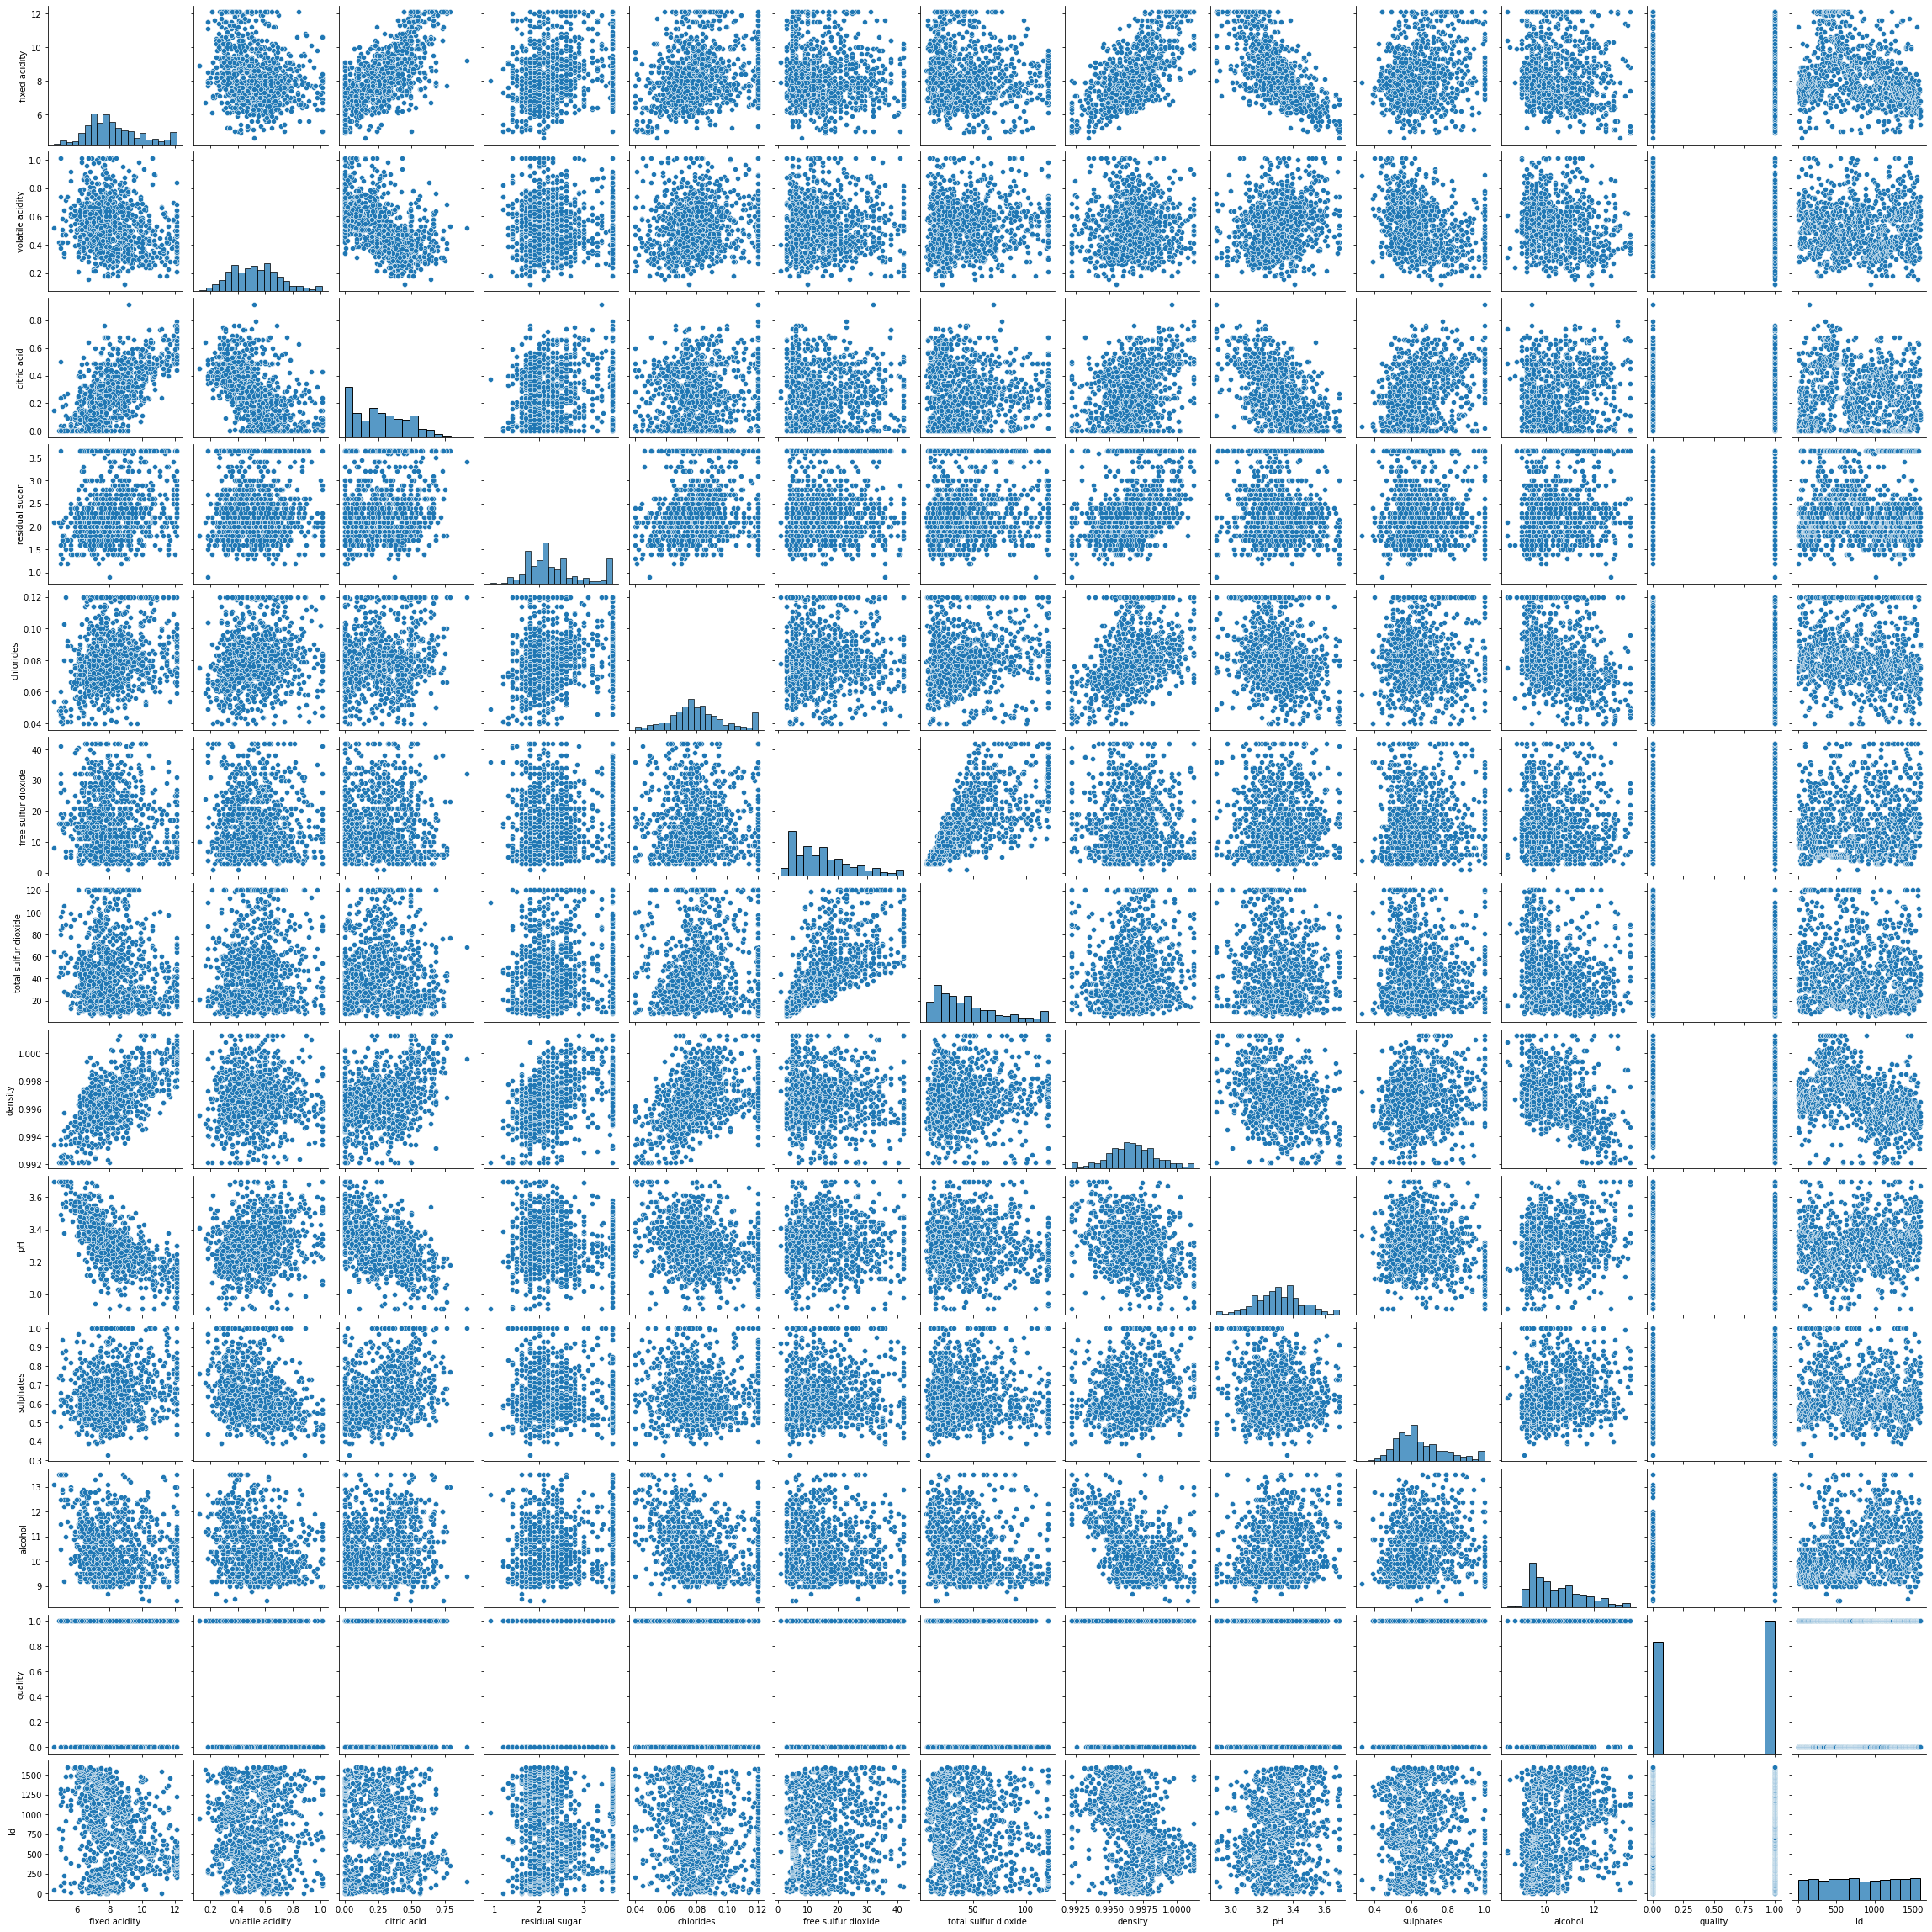

In [ ]:
sns.pairplot(data)

The pairplot above shows some linear regression in some the variable pairings.

In [ ]:
# Divide the data into independent and dependent variables
#X = data1.drop(["quality", "Id"], axis=1)
X = data[["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides",
           "free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]]
Y = data["quality"]                

   

### scaling of data

In [ ]:
# Feature scaling Standard scaler
scaler = StandardScaler()
X_st = pd.DataFrame(scaler.fit_transform(X))
X_st.head()

0         1         2         3         4         5         6   \
0 -0.533900  0.976574 -1.366461 -0.694433 -0.277578 -0.459107 -0.371385   
1 -0.288426  2.009888 -1.366461  0.454364  0.962203  0.980985  0.730024   
2 -0.288426  1.321012 -1.162732 -0.037977  0.624081 -0.047652  0.296135   
3  1.798101 -1.434494  1.485749 -0.694433 -0.333931  0.158075  0.496392   
4 -0.533900  0.976574 -1.366461 -0.694433 -0.277578 -0.459107 -0.371385   

         7         8         9         10  
0  0.583581  1.317532 -0.652385 -0.971613  
1  0.040775 -0.725715  0.227296 -0.597143  
2  0.149336 -0.330248  0.007376 -0.597143  
3  0.692142 -0.989360 -0.505772 -0.597143  
4  0.583581  1.317532 -0.652385 -0.971613

In [ ]:
# feature scaling with Min-Max Scaler
scaler1 = MinMaxScaler()
X_mm = pd.DataFrame(scaler1.fit_transform(X))
X_mm.head()

0         1         2         3       4         5         6   \
0  0.373333  0.650771  0.000000  0.363636  0.4500  0.243902  0.243478   
1  0.426667  0.852735  0.000000  0.618182  0.7250  0.585366  0.530435   
2  0.426667  0.718093  0.043716  0.509091  0.6500  0.341463  0.417391   
3  0.880000  0.179523  0.612022  0.363636  0.4375  0.390244  0.469565   
4  0.373333  0.650771  0.000000  0.363636  0.4500  0.243902  0.243478   

         7         8         9         10  
0  0.620055  0.766026  0.343284  0.196078  
1  0.510165  0.368590  0.522388  0.274510  
2  0.532143  0.445513  0.477612  0.274510  
3  0.642033  0.317308  0.373134  0.274510  
4  0.620055  0.766026  0.343284  0.196078

## splitting of data (80:20)


In [ ]:

x1_train, x1_test, y1_train, y1_test = train_test_split(X, Y, test_size=0.2, random_state=0)    #split without scaling
x2_train, x2_test, y2_train, y2_test = train_test_split(X_st, Y, test_size=0.2, random_state=0)   #split after StandardScaler
x3_train, x3_test, y3_train, y3_test = train_test_split(X_mm, Y, test_size=0.2, random_state=0)   # split after MinMaxScaler



### Model Training and Testing

# KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()
param = {
    'n_neighbors':[3,5,7,9,12,13,15,17,21],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':[10,15,20,25,30,35,45,50],
    'p':[1,2],
    'weights':['uniform', 'distance']
}
grid_cv = GridSearchCV(knn, param_grid=param)

In [ ]:
grid_cv.fit(x1_train, y1_train)
grid_cv.fit(x2_train, y2_train)
grid_cv.fit(x3_train, y3_train)


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 15, 20, 25, 30, 35, 45, 50],
                         'n_neighbors': [3, 5, 7, 9, 12, 13, 15, 17, 21],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [ ]:
# best parameters selected
grid_cv.best_params_
scores_trainsknn = grid_cv.cv_results_["mean_test_score"]
print("KNN scores:", scores_trainsknn)


KNN scores: [0.70345283 0.72096319 0.71221402 ... 0.74946256 0.71991233 0.75163634]


In [ ]:
# new model containing  knn best parameters
knn1 = KNeighborsClassifier(n_neighbors = 15, algorithm = "auto", leaf_size = 10, p = 1, weights = "distance")

In [ ]:
# fitting the model with the best parameters selected for the train_test_split method
knn1.fit(x1_train,y1_train) # original data
knn1.fit(x2_train,y2_train) # StandardScaler data
knn1.fit(x3_train,y3_train) # MinMaxScaler data

KNeighborsClassifier(leaf_size=10, n_neighbors=15, p=1, weights='distance')

In [ ]:
results1 = knn1.predict(x1_test)
results2 = knn1.predict(x2_test)
results3 = knn1.predict(x3_test)

print("Training accuracy on original data: {}".format(accuracy_score(knn1.predict(x1_train),y1_train)))
print("testing accuracy on original data: {}".format(accuracy_score(results1,y1_test)))
print("Training accuracy on standard scaler data: {}".format(accuracy_score(knn1.predict(x2_train),y2_train)))
print("testing accuracy on standard scaler data: {}".format(accuracy_score(results2,y2_test)))
print("Training accuracy on minmaxscaler data: {}".format(accuracy_score(knn1.predict(x3_train),y3_train)))
print("testing accuracy on minmaxscaler data: {}".format(accuracy_score(results3,y3_test)))


Training accuracy on original data: 0.6050328227571116
testing accuracy on original data: 0.611353711790393
Training accuracy on standard scaler data: 0.7013129102844639
testing accuracy on standard scaler data: 0.7467248908296943
Training accuracy on minmaxscaler data: 1.0
testing accuracy on minmaxscaler data: 0.8034934497816594


In [ ]:
#  Using Cross validation to check for accuracy
knnscores1 = cross_val_score(knn1, X, Y, cv=5)
knnscores2 = cross_val_score(knn1, X_st, Y, cv=5)
knnscores3 = cross_val_score(knn1, X_mm, Y, cv=5)
print("cross validation scores:{}".format(knnscores1))
print("average cross validation score:{}".format(knnscores1.mean()))
print("cross validation scores:{}".format(knnscores2))
print("average cross validation score:{}".format(knnscores2.mean()))
print("cross validation scores:{}".format(knnscores3))
print("average cross validation score:{}".format(knnscores3.mean()))


cross validation scores:[0.70305677 0.66375546 0.67248908 0.64473684 0.61403509]
average cross validation score:0.659614647973646
cross validation scores:[0.72489083 0.69432314 0.72925764 0.74561404 0.67982456]
average cross validation score:0.7147820424423503
cross validation scores:[0.73799127 0.70742358 0.71615721 0.73245614 0.6754386 ]
average cross validation score:0.7138933578487704


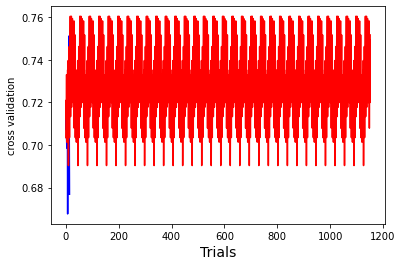

In [ ]:
param = {
    'n_neighbors':[3,5,7,9,12,13,15,17,21],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':[10,15,20,25,30,35,45,50],
    'p':[1,2],
    'weights':['uniform', 'distance']
}               
NUM_TRIALS = 15
knn3 = KNeighborsClassifier()
nested_scores = np.zeros(NUM_TRIALS)
for i in range(NUM_TRIALS):
    cv_inner = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    clf = GridSearchCV(estimator=knn3, param_grid=param, cv=outer_cv)
    nested_score = cross_val_score(clf, X=x1_test, y=y1_test, cv=outer_cv)
    nested_scores[i] = nested_score.mean()


#Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.plot(nested_scores, color="b")
plt.plot(scores_trainsknn ,color="r")
plt.xlabel("Trials", fontsize="14")
plt.ylabel("cross validation")
plt.show()


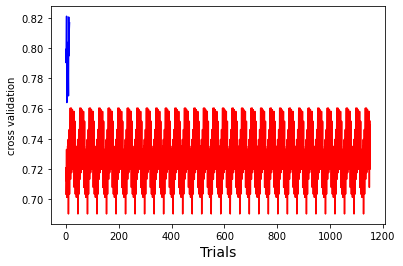

In [ ]:
param = {
    'n_neighbors':[3,5,7,9,12,13,15,17,21],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':[10,15,20,25,30,35,45,50],
    'p':[1,2],
    'weights':['uniform', 'distance']
}               
NUM_TRIALS = 15
knn3 = KNeighborsClassifier()
nested_scores = np.zeros(NUM_TRIALS)
for i in range(NUM_TRIALS):
    cv_inner = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    clf = GridSearchCV(estimator=knn3, param_grid=param, cv=outer_cv)
    nested_score = cross_val_score(clf, X=x2_test, y=y2_test, cv=outer_cv)
    nested_scores[i] = nested_score.mean()


#Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.plot(nested_scores, color="b")
plt.plot(scores_trainsknn ,color="r")
plt.xlabel("Trials", fontsize="14")
plt.ylabel("cross validation")
plt.show()


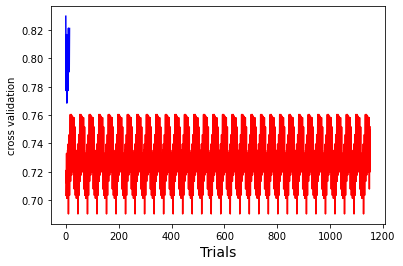

In [ ]:
param = {
    'n_neighbors':[3,5,7,9,12,13,15,17,21],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':[10,15,20,25,30,35,45,50],
    'p':[1,2],
    'weights':['uniform', 'distance']
}               
NUM_TRIALS = 15
knn3 = KNeighborsClassifier()
nested_scores = np.zeros(NUM_TRIALS)
for i in range(NUM_TRIALS):
    cv_inner = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    clf = GridSearchCV(estimator=knn3, param_grid=param, cv=outer_cv)
    nested_score = cross_val_score(clf, X=x3_test, y=y3_test, cv=outer_cv)
    nested_scores[i] = nested_score.mean()


#Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.plot(nested_scores, color="b")
plt.plot(scores_trainsknn ,color="r")
plt.xlabel("Trials", fontsize="14")
plt.ylabel("cross validation")
plt.show()

# SUPPORT VECTOR MACHINE

In [ ]:
svc = SVC()
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

In [ ]:
svm_grid = GridSearchCV(svc, param_grid, verbose=3)


In [ ]:
svm_grid.fit(x1_train, y1_train)
svm_grid.fit(x2_train, y2_train)
svm_grid.fit(x3_train, y3_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .............................C=1, kernel=linear; total time=   0.1s
[CV 2/5] END .............................C=1, kernel=linear; total time=   0.1s
[CV 3/5] END .............................C=1, kernel=linear; total time=   0.1s
[CV 4/5] END .............................C=1, kernel=linear; total time=   0.1s
[CV 5/5] END .............................C=1, kernel=linear; total time=   0.0s
[CV 1/5] END ............................C=10, kernel=linear; total time=   1.3s
[CV 2/5] END ............................C=10, kernel=linear; total time=   1.5s
[CV 3/5] END ............................C=10, kernel=linear; total time=   1.5s
[CV 4/5] END ............................C=10, kernel=linear; total time=   1.4s
[CV 5/5] END ............................C=10, kernel=linear; total time=   1.0s
[CV 1/5] END ...........................C=100, kernel=linear; total time=   9.0s
[CV 2/5] END ...........................C=100, k

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             verbose=3)

In [ ]:
# best parameters selected
svm_grid.best_params_

{'C': 1000, 'kernel': 'linear'}

In [ ]:
scores_trainsvc = svm_grid.cv_results_['mean_test_score']
print("SVC scores:",scores_trainsvc)

In [ ]:
# new model containing best parameters
svc1 = SVC(kernel = "linear", C = 1000)

In [ ]:
# train_test_split method
svc1.fit(x1_train,y1_train) # fitting model with best parameters with original training data
svc1.fit(x2_train,y2_train) # fitting model with best parameters with StandardScaler training data
svc1.fit(x3_train,y3_train) # fitting model with best parameters with MinMaxScaler training data


SVC(C=1000, kernel='linear')

In [ ]:
svcpred1 = svc1.predict(x1_test)
svcpred2 = svc1.predict(x2_test)
svcpred3 = svc1.predict(x3_test)

print("Training accuracy on original data: {}".format(accuracy_score(svc1.predict(x1_train),y1_train)))
print("testing accuracy on original data: {}".format(accuracy_score(svcpred1,y1_test)))
print("Training accuracy on standard scaler data: {}".format(accuracy_score(svc1.predict(x2_train),y2_train)))
print("testing accuracy on standard scaler data: {}".format(accuracy_score(svcpred2,y2_test)))
print("Training accuracy on minmaxscaler data: {}".format(accuracy_score(svc1.predict(x3_train),y3_train)))
print("testing accuracy on standard scaler data: {}".format(accuracy_score(svcpred3,y3_test)))


Training accuracy on original data: 0.6356673960612691
testing accuracy on original data: 0.6637554585152838
Training accuracy on standard scaler data: 0.7286652078774617
testing accuracy on standard scaler data: 0.7554585152838428
Training accuracy on minmaxscaler data: 0.7560175054704595
testing accuracy on standard scaler data: 0.8034934497816594


In [ ]:
#  Using Cross validation to check for accuracy
svcscores1 = cross_val_score(svc1, X, Y, cv=5)
svcscores2 = cross_val_score(svc1, X_st, Y, cv=5)
svcscores3 = cross_val_score(svc1, X_mm, Y, cv=5)
print("cross validation scores:{}".format(svcscores1))
print("average cross validation score:{}".format(svcscores1.mean()))
print("cross validation scores:{}".format(svcscores2))
print("average cross validation score:{}".format(svcscores2.mean()))
print("cross validation scores:{}".format(svcscores3))
print("average cross validation score:{}".format(svcscores3.mean()))

cross validation scores:[0.68122271 0.73362445 0.7860262  0.76754386 0.74561404]
average cross validation score:0.7428062514364514
cross validation scores:[0.70742358 0.70305677 0.75982533 0.75       0.75      ]
average cross validation score:0.734061135371179
cross validation scores:[0.71179039 0.70305677 0.75982533 0.75       0.75      ]
average cross validation score:0.7349344978165939


In [ ]:
# printing accuracy scores for original data, Standardscaler, MinMaxScaler and RobustScaler data
print(svc1.score(x1_test, y1_test)) # original data
print(svc1.score(x2_test, y2_test))  # StandardScaler data
print(svc1.score(x3_test, y3_test))  # MinMaxScaler data
  


0.6637554585152838
0.7554585152838428
0.8034934497816594


In [ ]:
#  Using Cross validation to check for accuracy

svcscores1 = cross_val_score(svc1, X, Y, cv=5)
svcscores2 = cross_val_score(svc1, X_st, Y, cv=5)
svcscores3 = cross_val_score(svc1, X_mm, Y, cv=5)

print(svcscores1.mean()) # printing accuracy scores for original data
print(svcscores2.mean()) # printing accuracy scores for StandardScaler data
print(svcscores3.mean()) # printing accuracy scores for MinMaxScaler data


0.7428062514364514
0.734061135371179
0.7349344978165939


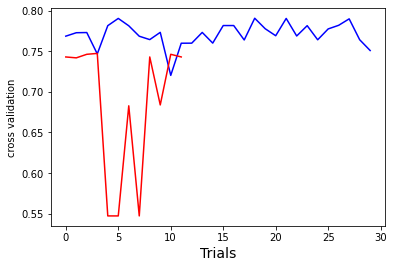

In [ ]:
param =[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}]                          
NUM_TRIALS = 30
svc = SVC()

nested_scores = np.zeros(NUM_TRIALS)

for i in range(NUM_TRIALS):
    cv_inner = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    clf = GridSearchCV(estimator=svc, param_grid=param, cv=outer_cv)
    nested_score = cross_val_score(clf, X=x1_test, y=y1_test, cv=outer_cv)
    nested_scores[i] = nested_score.mean()


#Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.plot(nested_scores, color="b")
plt.plot(scores_trainsvc ,color="r")
plt.xlabel("Trials", fontsize="14")
plt.ylabel("cross validation")
plt.show()


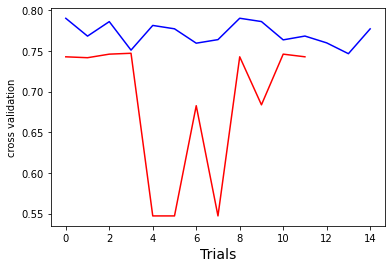

In [ ]:
param =[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}]                          
NUM_TRIALS = 15
svc = SVC()

nested_scores = np.zeros(NUM_TRIALS)

for i in range(NUM_TRIALS):
    cv_inner = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    clf = GridSearchCV(estimator=svc, param_grid=param, cv=outer_cv)
    nested_score = cross_val_score(clf, X=x2_test, y=y2_test, cv=outer_cv)
    nested_scores[i] = nested_score.mean()


#Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.plot(nested_scores, color="b")
plt.plot(scores_trainsvc ,color="r")
plt.xlabel("Trials", fontsize="14")
plt.ylabel("cross validation")
plt.show()


In [ ]:
param =[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}]                          
NUM_TRIALS = 15
svc = SVC()

nested_scores = np.zeros(NUM_TRIALS)

for i in range(NUM_TRIALS):
    cv_inner = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    clf = GridSearchCV(estimator=svc, param_grid=param, cv=outer_cv)
    nested_score = cross_val_score(clf, X=x1_test, y=y1_test, cv=outer_cv)
    nested_scores[i] = nested_score.mean()


#Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.plot(nested_scores, color="b")
plt.plot(scores_trainsvc ,color="r")
plt.xlabel("Trials", fontsize="14")
plt.ylabel("cross validation")
plt.show()


# Random Forest Classifier

In [ ]:
rf = RandomForestClassifier()
param_dist = {"n_estimators": [10,50,100],
              "max_depth": [3, None],
              "max_features": ["sqrt"],
              "min_samples_split": [2,11],
              "min_samples_leaf": [1,11],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]} 
r_cl = GridSearchCV(rf, param_dist, n_jobs=-1,cv=3, verbose=True)


In [ ]:
# training with train_test_split
r_cl.fit(x1_train, y1_train)
r_cl.fit(x2_train, y2_train)
r_cl.fit(x3_train, y3_train)


Fitting 3 folds for each of 96 candidates, totalling 288 fits
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Fitting 3 folds for each of 96 candidates, totalling 288 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, None], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 11],
                         'min_samples_split': [2, 11],
                         'n_estimators': [10, 50, 100]},
             verbose=True)

In [ ]:
# selection of RandomForest best parameters
r_cl.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
scores_trainrf = r_cl.cv_results_['mean_test_score']
print("Random Forest scores:",scores_trainrf)

In [ ]:
# new model containing best parameters
rf1 = RandomForestClassifier(bootstrap = True, criterion = "gini", 
                             max_depth = None, max_features = "sqrt", min_samples_leaf = 1, min_samples_split = 2,
                            n_estimators = 100, random_state=0)

In [ ]:
# fitting the model with the best parameters selected for the train_test_split method
rf1.fit(x1_train,y1_train) # fitting original data split
rf1.fit(x2_train,y2_train)  # fitting StandardScaler data split
rf1.fit(x3_train,y3_train)  # fitting MinMaxScaler data split



RandomForestClassifier(max_features='sqrt', random_state=0)

In [ ]:
# printing accuracy scores for original data, Standardscaler, MinMaxScaler and RobustScaler data

rfpred1 = rf1.predict(x1_test)
rfpred2 = rf1.predict(x2_test)
rfpred3 = rf1.predict(x3_test)

print("Training accuracy on original data: {}".format(accuracy_score(rf1.predict(x1_train),y1_train)))
print("testing accuracy on original data: {}".format(accuracy_score(rfpred1,y1_test)))
print("Training accuracy on standard scaler data: {}".format(accuracy_score(rf1.predict(x2_train),y2_train)))
print("testing accuracy on standard scaler data: {}".format(accuracy_score(rfpred2,y2_test)))
print("Training accuracy on minmaxscaler data: {}".format(accuracy_score(rf1.predict(x3_train),y3_train)))
print("testing accuracy on minmaxscaler data: {}".format(accuracy_score(rfpred3,y3_test)))



Training accuracy on original data: 0.600656455142232
testing accuracy on original data: 0.6026200873362445
Training accuracy on standard scaler data: 0.7045951859956237
testing accuracy on standard scaler data: 0.7248908296943232
Training accuracy on minmaxscaler data: 1.0
testing accuracy on minmaxscaler data: 0.8034934497816594


In [ ]:
print(accuracy_score(y1_test,rfpred1)) 
print(accuracy_score(y2_test,rfpred2))
print(accuracy_score(y3_test,rfpred3))


0.6026200873362445
0.7248908296943232
0.8034934497816594


In [ ]:
#  Using Cross validation to check for accuracy
rfscores1 = cross_val_score(rf1, X, Y, cv=5)
rfscores2 = cross_val_score(rf1, X_st, Y, cv=5)
rfscores3 = cross_val_score(rf1, X_mm, Y, cv=5)
print("cross validation scores:{}".format(rfscores1))
print("average cross validation score:{}".format(rfscores1.mean()))
print("cross validation scores:{}".format(rfscores2))
print("average cross validation score:{}".format(rfscores2.mean()))
print("cross validation scores:{}".format(rfscores3))
print("average cross validation score:{}".format(rfscores3.mean()))

cross validation scores:[0.69432314 0.73362445 0.72925764 0.74122807 0.70614035]
average cross validation score:0.7209147322454608
cross validation scores:[0.69868996 0.72489083 0.72489083 0.74122807 0.70175439]
average cross validation score:0.7182908143721749
cross validation scores:[0.69868996 0.72925764 0.72925764 0.74122807 0.73684211]
average cross validation score:0.7270550831226538


In [ ]:
#  Using Cross validation to check for accuracy
cv_rf1=cross_val_score(rf1,X,Y,cv=5)
cv_rf2=cross_val_score(rf1,X_st,Y,cv=5)
cv_rf3=cross_val_score(rf1,X_mm,Y,cv=5)
print(cv_rf1.mean())  # printing accuracy scores for original data
print(cv_rf2.mean())  # printing accuracy scores for StandardScaler data
print(cv_rf3.mean())  # printing accuracy scores for MinMaxScaler data

0.7209147322454608
0.7182908143721749
0.7270550831226538


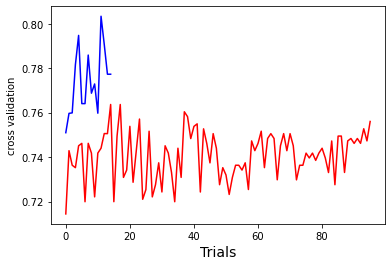

In [ ]:
pg = {"n_estimators": [10,50,100],
              "max_depth": [3, None],
              "max_features": ["sqrt"],
              "min_samples_split": [2,11],
              "min_samples_leaf": [1,11],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}                            
NUM_TRIALS = 15
rf = RandomForestClassifier()
nested_scores = np.zeros(NUM_TRIALS)
for i in range(NUM_TRIALS):
    cv_inner = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    clf = GridSearchCV(estimator=rf, param_grid=pg, cv=outer_cv)
    nested_score = cross_val_score(clf, X=x1_test, y=y1_test, cv=outer_cv)
    nested_scores[i] = nested_score.mean()
#Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.plot(nested_scores, color="b")
plt.plot(scores_trainrf ,color="r")
plt.xlabel("Trials", fontsize="14")
plt.ylabel("cross validation")
plt.show()    



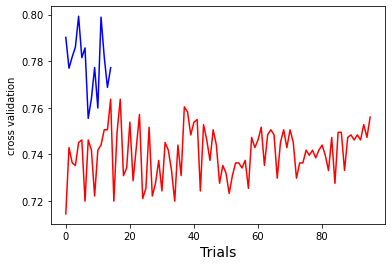

In [ ]:
pg = {"n_estimators": [10,50,100],
              "max_depth": [3, None],
              "max_features": ["sqrt"],
              "min_samples_split": [2,11],
              "min_samples_leaf": [1,11],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}                            
NUM_TRIALS = 15
rf = RandomForestClassifier()
nested_scores = np.zeros(NUM_TRIALS)
for i in range(NUM_TRIALS):
    cv_inner = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    clf = GridSearchCV(estimator=rf, param_grid=pg, cv=outer_cv)
    nested_score = cross_val_score(clf, X=x2_test, y=y2_test, cv=outer_cv)
    nested_scores[i] = nested_score.mean()
#Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.plot(nested_scores, color="b")
plt.plot(scores_trainrf ,color="r")
plt.xlabel("Trials", fontsize="14")
plt.ylabel("cross validation")
plt.show()    


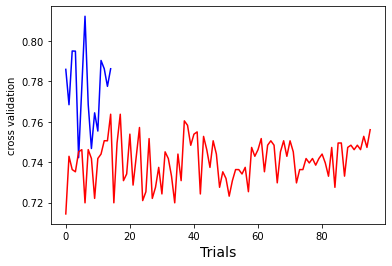

In [ ]:
pg = {"n_estimators": [10,50,100],
              "max_depth": [3, None],
              "max_features": ["sqrt"],
              "min_samples_split": [2,11],
              "min_samples_leaf": [1,11],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}                            
NUM_TRIALS = 15
rf = RandomForestClassifier()
nested_scores = np.zeros(NUM_TRIALS)
for i in range(NUM_TRIALS):
    cv_inner = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    clf = GridSearchCV(estimator=rf, param_grid=pg, cv=outer_cv)
    nested_score = cross_val_score(clf, X=x3_test, y=y3_test, cv=outer_cv)
    nested_scores[i] = nested_score.mean()
#Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.plot(nested_scores, color="b")
plt.plot(scores_trainrf ,color="r")
plt.xlabel("Trials", fontsize="14")
plt.ylabel("cross validation")
plt.show()    


### DecisionTree Classifier

In [ ]:
dt = DecisionTreeClassifier(random_state=123)
tree_param = [{'criterion': ['entropy', 'gini'], 'max_depth':[7,8,9,10],'min_samples_split':[3,4,5,6,7]}]
dt_grid = GridSearchCV(dt,tree_param,cv=5,n_jobs=-1,verbose=2)

In [ ]:
# training with train_test_split
dt_grid.fit(x1_train, y1_train)
dt_grid.fit(x2_train, y2_train)
dt_grid.fit(x3_train, y3_train)


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             n_jobs=-1,
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': [7, 8, 9, 10],
                          'min_samples_split': [3, 4, 5, 6, 7]}],
             verbose=2)

In [ ]:
# selection of  DecisionTree best parameters
dt_grid.best_params_

{'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 5}

In [ ]:
scores_traindt = dt_grid.cv_results_['mean_test_score']
print("Decision tree scores:",scores_traindt)

In [ ]:
# new Decision Tree Classifier with best parameters
dt1 = DecisionTreeClassifier(criterion = 'gini', max_depth = 9, min_samples_split = 5, random_state=123)

In [ ]:
# fitting the model with the best parameters selected for the train_test_split method
dt1.fit(x1_train,y1_train) # fitting original data split
dt1.fit(x2_train,y2_train)  # fitting StandardScaler data split
dt1.fit(x3_train,y3_train)  # fitting MinMaxScaler data split


DecisionTreeClassifier(max_depth=9, min_samples_split=5, random_state=123)

In [ ]:
# printing accuracy scores for original data, Standardscaler, MinMaxScaler and RobustScaler data

dtpred1 = dt1.predict(x1_test)
dtpred2 = dt1.predict(x2_test)
dtpred3 = dt1.predict(x3_test)

print("Training accuracy on original data: {}".format(accuracy_score(dt1.predict(x1_train),y1_train)))
print("testing accuracy on original data: {}".format(accuracy_score(dtpred1,y1_test)))
print("Training accuracy on standard scaler data: {}".format(accuracy_score(dt1.predict(x2_train),y2_train)))
print("testing accuracy on standard scaler data: {}".format(accuracy_score(dtpred2,y2_test)))
print("Training accuracy on minmaxscaler data: {}".format(accuracy_score(dt1.predict(x3_train),y3_train)))
print("testing accuracy on minmaxscaler data: {}".format(accuracy_score(dtpred3,y3_test)))



Training accuracy on original data: 0.5612691466083151
testing accuracy on original data: 0.5720524017467249
Training accuracy on standard scaler data: 0.5525164113785558
testing accuracy on standard scaler data: 0.6200873362445415
Training accuracy on minmaxscaler data: 0.9321663019693655
testing accuracy on minmaxscaler data: 0.7205240174672489


In [ ]:
# printing accuracy scores for original data, Standardscaler, MinMaxScaler and RobustScaler data

dtpred1 = dt1.predict(x1_test)
dtpred2 = dt1.predict(x2_test)
dtpred3 = dt1.predict(x3_test)

print(accuracy_score(y1_test,dtpred1)) 
print(accuracy_score(y2_test,dtpred2))
print(accuracy_score(y3_test,dtpred3))


0.5720524017467249
0.6200873362445415
0.7205240174672489


In [ ]:
#  Using Cross validation to check for accuracy
dtscores1 = cross_val_score(dt1, X, Y, cv=5)
dtscores2 = cross_val_score(dt1, X_st, Y, cv=5)
dtscores3 = cross_val_score(dt1, X_mm, Y, cv=5)
print("cross validation scores:{}".format(dtscores1))
print("average cross validation score:{}".format(dtscores1.mean()))
print("cross validation scores:{}".format(dtscores2))
print("average cross validation score:{}".format(dtscores2.mean()))
print("cross validation scores:{}".format(dtscores3))
print("average cross validation score:{}".format(dtscores3.mean()))

cross validation scores:[0.6069869  0.68122271 0.65502183 0.68859649 0.70175439]
average cross validation score:0.6667164636482035
cross validation scores:[0.6069869  0.68558952 0.65065502 0.68859649 0.68421053]
average cross validation score:0.6632076917183789
cross validation scores:[0.6069869  0.6768559  0.65502183 0.68859649 0.68421053]
average cross validation score:0.6623343292729641


In [ ]:
#  Using Cross validation to check for accuracy
cv_dt1=cross_val_score(dt1,X,Y,cv=5)
cv_dt2=cross_val_score(dt1,X_st,Y,cv=5)
cv_dt3=cross_val_score(dt1,X_mm,Y,cv=5)

print(cv_dt1.mean())  # printing accuracy scores for original data
print(cv_dt2.mean())  # printing accuracy scores for StandardScaler data
print(cv_dt3.mean())  # printing accuracy scores for MinMaxScaler data


0.6667164636482035
0.6632076917183789
0.6623343292729641


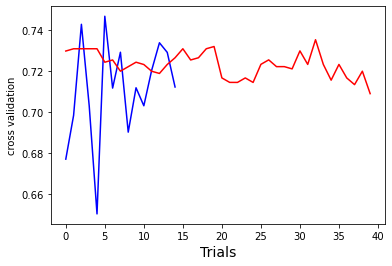

In [ ]:
param = {'criterion': ['entropy', 'gini'], 'max_depth':[7,8,9,10],'min_samples_split':[3,4,5,6,7]}                           
NUM_TRIALS = 15
dt = DecisionTreeClassifier() 
nested_scores = np.zeros(NUM_TRIALS)
for i in range(NUM_TRIALS):
    cv_inner = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    clf = GridSearchCV(estimator=dt, param_grid=param, cv=outer_cv)
    nested_score = cross_val_score(clf, X=x1_test, y=y1_test, cv=outer_cv)
    nested_scores[i] = nested_score.mean()
#Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.plot(nested_scores, color="b")
plt.plot(scores_traindt,color="r")
plt.xlabel("Trials", fontsize="14")
plt.ylabel("cross validation")
plt.show()    

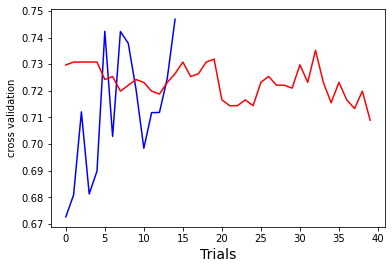

In [ ]:
param = {'criterion': ['entropy', 'gini'], 'max_depth':[7,8,9,10],'min_samples_split':[3,4,5,6,7]}                           
NUM_TRIALS = 15
dt = DecisionTreeClassifier() 
nested_scores = np.zeros(NUM_TRIALS)
for i in range(NUM_TRIALS):
    cv_inner = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    clf = GridSearchCV(estimator=dt, param_grid=param, cv=outer_cv)
    nested_score = cross_val_score(clf, X=x2_test, y=y2_test, cv=outer_cv)
    nested_scores[i] = nested_score.mean()
#Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.plot(nested_scores, color="b")
plt.plot(scores_traindt,color="r")
plt.xlabel("Trials", fontsize="14")
plt.ylabel("cross validation")
plt.show()   

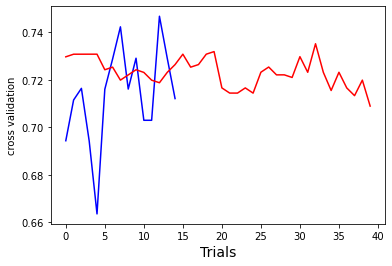

In [ ]:
param = {'criterion': ['entropy', 'gini'], 'max_depth':[7,8,9,10],'min_samples_split':[3,4,5,6,7]}                           
NUM_TRIALS = 15
dt = DecisionTreeClassifier() 
nested_scores = np.zeros(NUM_TRIALS)
for i in range(NUM_TRIALS):
    cv_inner = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    clf = GridSearchCV(estimator=dt, param_grid=param, cv=outer_cv)
    nested_score = cross_val_score(clf, X=x3_test, y=y3_test, cv=outer_cv)
    nested_scores[i] = nested_score.mean()
#Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.plot(nested_scores, color="b")
plt.plot(scores_traindt,color="r")
plt.xlabel("Trials", fontsize="14")
plt.ylabel("cross validation")
plt.show()   